<a href="https://colab.research.google.com/github/Praewphat/bsc_dpdm22/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE


## เขียน function ตรวจสอบค่าที่เติม 0 ผิด

In [6]:
max(10,2)

10

In [8]:
def check_v(in1,in2):
    return max(in1/in2,in2/in1)

In [9]:
check_v(100,12)

8.333333333333334

In [10]:
check_v(100,1200)

12.0

# Load ตารางจาก google sheet

https://towardsdatascience.com/read-data-from-google-sheets-into-pandas-without-the-google-sheets-api-5c468536550

## บ้าน

In [11]:
link = 'https://docs.google.com/spreadsheets/d/1jIF55aFmr8rqqK7dBMXoyA71TWlHdIiiQAa0p1Dr794/export?format=xlsx'
Home = pd.read_excel(link,sheet_name='บ้าน')
Home

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2500000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2700000.0,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
2,1,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2200000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2400000.0,"ราคาเสนอขายประมาณ 2,200,000 - 2,500,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
4,1,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,6050000,5000000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
...,...,...,...,...,...,...,...,...,...
1215,1,https://nayoo.co/khonkaen/posts/6257,บ้านเดี่ยว,มั่นใจ,295000,500000.0,เพื่อป้องกันปัญหาที่อาจเกิดขึ้นภายหลังหากต้องม...,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1216,2,https://nayoo.co/khonkaen/posts/6258,บ้านเดี่ยว,มั่นใจ,615000,500000.0,ราคาเสนอขาย 3-5 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1217,1,https://nayoo.co/khonkaen/posts/6258,บ้านเดี่ยว,มั่นใจ,615000,600000.0,เพื่อป้องกันปัญหาที่อาจเกิดขึ้นภายหลังหากต้องม...,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1218,2,https://nayoo.co/khonkaen/posts/6260,บ้านเดี่ยว,มั่นใจ,620000,700000.0,ราคาเสนอขาย 4-5 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [15]:
#ก่อนแก้ไขข้อมูล
link = 'https://docs.google.com/spreadsheets/d/1jIF55aFmr8rqqK7dBMXoyA71TWlHdIiiQAa0p1Dr794/export?format=xlsx'
Home = pd.read_excel(link,sheet_name='บ้าน')
id1 = Home[Home['ID ผู้ประเมิน']==1]
id1 = id1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id2 = Home[Home['ID ผู้ประเมิน']==2]
id2 = id2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id1MAPE = MAPE(id1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id1['ราคาทรัพย์']))
id2MAPE = MAPE(id2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nบ้าน\nนักประเมิน คนที่ 1 = {id1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {id2MAPE*100:.2f}%')
id2['ประเมิน1'] = id2['post id'].map(id1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id2_1 = id2.rename(columns={"ประเมินราคาซื้อ-ขาย": "ประเมิน2"})
id2_d = id2_1.dropna(subset=['ประเมิน1','ประเมิน2','ราคาทรัพย์'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง {((id1MAPE)+(id2MAPE))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(id2_d)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
บ้าน
นักประเมิน คนที่ 1 = 14.50%
นักประเมิน คนที่ 2 = 11.14%
ความผิดพลาดระหว่างนักประเมินทั้ง 12.82%
จำนวนทรัพย์ทั้งหมด 498 ทรัพย์


In [16]:
#หลังแก้ไขข้อมูล
link1 = 'https://docs.google.com/spreadsheets/d/1O0ke1_iRVnIss8BMi6ez0sHcdVto-pOFY7ImUoOJr0o/export?format=xlsx'
Home2 = pd.read_excel(link1,sheet_name='บ้าน')
id1 = Home2[Home2['ID ผู้ประเมิน']==1]
id1 = id1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id2 = Home2[Home2['ID ผู้ประเมิน']==2]
id2 = id2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id1MAPE1 = MAPE(id1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id1['ราคาทรัพย์']))
id2MAPE2 = MAPE(id2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nบ้าน\nนักประเมิน คนที่ 1 = {id1MAPE1*100:.2f}%\nนักประเมิน คนที่ 2 = {id2MAPE2*100:.2f}%')
id2['ประเมิน1'] = id2['post id'].map(id1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id2_1 = id2.rename(columns={"ประเมินราคาซื้อ-ขาย": "ประเมิน2"})
id2_d1 = id2_1.dropna(subset=['ประเมิน1','ประเมิน2','ราคาทรัพย์'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง {((id1MAPE)+(id2MAPE))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(id2_d1)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
บ้าน
นักประเมิน คนที่ 1 = 12.97%
นักประเมิน คนที่ 2 = 9.18%
ความผิดพลาดระหว่างนักประเมินทั้ง 12.82%
จำนวนทรัพย์ทั้งหมด 497 ทรัพย์


In [17]:
id2_d

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมิน2,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,ประเมิน1
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2700000.0,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,2500000.0
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2400000.0,"ราคาเสนอขายประมาณ 2,200,000 - 2,500,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2200000.0
5,2,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,6050000,9000000.0,"โซนนี้ราคาซื้อขาย ประมาณ 10,000-20,000 บาท/ตาร...",NaN,5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน,5000000.0
7,2,https://nayoo.co/khonkaen/posts/564,บ้านเดี่ยว,มั่นใจ,4400000,3700000.0,"เสนอขาย 3,500,000 - 4,200,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3500000.0
9,2,https://nayoo.co/khonkaen/posts/566,บ้านเดี่ยว,มั่นใจ,2750000,2500000.0,"ราคาเสนอขาย 2,000,0000 - 2,800,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2500000.0
...,...,...,...,...,...,...,...,...,...,...
1210,2,https://nayoo.co/khonkaen/posts/6255,บ้านเดี่ยว,มั่นใจ,260000,300000.0,ราคาเสนอขาย 2-3 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,550000.0
1212,2,https://nayoo.co/khonkaen/posts/6256,บ้านเดี่ยว,มั่นใจ,610000,500000.0,ราคาเสนอขาย 4-6 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,700000.0
1214,2,https://nayoo.co/khonkaen/posts/6257,บ้านเดี่ยว,มั่นใจ,295000,300000.0,ราคาเสนอขาย 1-2 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,500000.0
1216,2,https://nayoo.co/khonkaen/posts/6258,บ้านเดี่ยว,มั่นใจ,615000,500000.0,ราคาเสนอขาย 3-5 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,600000.0


In [18]:
id2_d.isnull().any()

ID ผู้ประเมิน                     False
post id                           False
property_type                     False
ความมั่นใจในการเมินราคาทรัพย์     False
ราคาทรัพย์                        False
ประเมิน2                          False
ปัจจัยในการประเมินราคาซื้อ-ขาย    False
เหตุผลไม่มั่นใจราคาประเมิน         True
ให้คะแนนทรัพย์                    False
ประเมิน1                          False
dtype: bool

In [19]:
id2_d['check1']=id2_d.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)
id2_d['check2']=id2_d.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)
id2_d
     

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมิน2,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,ประเมิน1,check1,check2
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2700000.0,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,2500000.0,1.156000,1.070370
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2400000.0,"ราคาเสนอขายประมาณ 2,200,000 - 2,500,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2200000.0,1.181818,1.083333
5,2,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,6050000,9000000.0,"โซนนี้ราคาซื้อขาย ประมาณ 10,000-20,000 บาท/ตาร...",NaN,5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน,5000000.0,1.210000,1.487603
7,2,https://nayoo.co/khonkaen/posts/564,บ้านเดี่ยว,มั่นใจ,4400000,3700000.0,"เสนอขาย 3,500,000 - 4,200,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3500000.0,1.257143,1.189189
9,2,https://nayoo.co/khonkaen/posts/566,บ้านเดี่ยว,มั่นใจ,2750000,2500000.0,"ราคาเสนอขาย 2,000,0000 - 2,800,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2500000.0,1.100000,1.100000
...,...,...,...,...,...,...,...,...,...,...,...,...
1210,2,https://nayoo.co/khonkaen/posts/6255,บ้านเดี่ยว,มั่นใจ,260000,300000.0,ราคาเสนอขาย 2-3 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,550000.0,2.115385,1.153846
1212,2,https://nayoo.co/khonkaen/posts/6256,บ้านเดี่ยว,มั่นใจ,610000,500000.0,ราคาเสนอขาย 4-6 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,700000.0,1.147541,1.220000
1214,2,https://nayoo.co/khonkaen/posts/6257,บ้านเดี่ยว,มั่นใจ,295000,300000.0,ราคาเสนอขาย 1-2 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,500000.0,1.694915,1.016949
1216,2,https://nayoo.co/khonkaen/posts/6258,บ้านเดี่ยว,มั่นใจ,615000,500000.0,ราคาเสนอขาย 3-5 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,600000.0,1.025000,1.230000


In [20]:
home = id2_d[['post id','ราคาทรัพย์','ประเมิน1','ประเมิน2','check1','check2']]
home.sort_values(by=['check1'],ascending=False)

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
802,https://nayoo.co/khonkaen/posts/3208,23900000,2300000.0,2200000.0,10.391304,10.863636
1070,https://nayoo.co/khonkaen/posts/6037,1450000,3500000.0,3000000.0,2.413793,2.068966
228,https://nayoo.co/khonkaen/posts/525,1933000,830000.0,2200000.0,2.328916,1.138127
1210,https://nayoo.co/khonkaen/posts/6255,260000,550000.0,300000.0,2.115385,1.153846
767,https://nayoo.co/khonkaen/posts/2321,465000,900000.0,400000.0,1.935484,1.162500
...,...,...,...,...,...,...
266,https://nayoo.co/khonkaen/posts/585,3300000,3300000.0,3500000.0,1.000000,1.060606
63,https://nayoo.co/khonkaen/posts/2033,1200000,1200000.0,1000000.0,1.000000,1.200000
652,https://nayoo.co/khonkaen/posts/2256,2000000,2000000.0,2200000.0,1.000000,1.100000
43,https://nayoo.co/khonkaen/posts/1128,4200000,4200000.0,5000000.0,1.000000,1.190476


In [21]:
home.sort_values(by=['check1','check2'],ascending=False)

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
802,https://nayoo.co/khonkaen/posts/3208,23900000,2300000.0,2200000.0,10.391304,10.863636
1070,https://nayoo.co/khonkaen/posts/6037,1450000,3500000.0,3000000.0,2.413793,2.068966
228,https://nayoo.co/khonkaen/posts/525,1933000,830000.0,2200000.0,2.328916,1.138127
1210,https://nayoo.co/khonkaen/posts/6255,260000,550000.0,300000.0,2.115385,1.153846
767,https://nayoo.co/khonkaen/posts/2321,465000,900000.0,400000.0,1.935484,1.162500
...,...,...,...,...,...,...
198,https://nayoo.co/khonkaen/posts/31,4000000,4000000.0,3900000.0,1.000000,1.025641
548,https://nayoo.co/khonkaen/posts/1649,4500000,4500000.0,4500000.0,1.000000,1.000000
622,https://nayoo.co/khonkaen/posts/2078,3500000,3500000.0,3500000.0,1.000000,1.000000
763,https://nayoo.co/khonkaen/posts/2319,1200000,1200000.0,1200000.0,1.000000,1.000000


## ที่ดิน

In [22]:
link = 'https://docs.google.com/spreadsheets/d/1jIF55aFmr8rqqK7dBMXoyA71TWlHdIiiQAa0p1Dr794/export?format=xlsx'
land = pd.read_excel(link,sheet_name='land')
land

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,1800000.0,"8,000-25,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1,2,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,2000000.0,"ราคาเสนอขาย 7,000-12,0000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
2,4,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,2200000.0,10000-22000,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
3,1,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000,8000000.0,"25,000-80,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,2,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000,12000000.0,"ราคาเสนอขาย 100,000-150,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
...,...,...,...,...,...,...,...,...,...
205,1,https://nayoo.co/khonkaen/posts/17093,ที่ดิน,มั่นใจ,2650000,2000000.0,"500-15,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
206,2,https://nayoo.co/khonkaen/posts/17112,ที่ดิน,มั่นใจ,1300000,1500000.0,"ราคาเสนอขาย 3,000 - 5,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
207,1,https://nayoo.co/khonkaen/posts/17112,ที่ดิน,มั่นใจ,1300000,1500000.0,"500-25,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
208,2,https://nayoo.co/khonkaen/posts/17145,ที่ดิน,มั่นใจ,3000000,2800000.0,"ราคาเสนอขาย 10,000 - 15,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี


In [23]:
#ก่อนแก้ไขข้อมูล
link = 'https://docs.google.com/spreadsheets/d/1jIF55aFmr8rqqK7dBMXoyA71TWlHdIiiQAa0p1Dr794/export?format=xlsx'
land = pd.read_excel(link,sheet_name='land')
L1 = land[land['ID ผู้ประเมิน']==1]
L1 = L1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
L2 = land[land['ID ผู้ประเมิน']==2]
L2 = L2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
L1MAPE = MAPE(L1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(L1['ราคาทรัพย์']))
L2MAPE = MAPE(L2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(L2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nที่ดิน\nนักประเมิน คนที่ 1 = {L1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {L2MAPE*100:.2f}%')
L2['ประเมิน1'] = L2['post id'].map(L1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
L2_1 = L2.rename(columns={"ประเมินราคาซื้อ-ขาย": "ประเมิน2"})
L2_d = L2_1.dropna(subset=['ประเมิน1','ประเมิน2','ราคาทรัพย์'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง {((L1MAPE)+(L2MAPE))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(L2_d)} ทรัพย์')
     

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
ที่ดิน
นักประเมิน คนที่ 1 = 79.74%
นักประเมิน คนที่ 2 = 43.70%
ความผิดพลาดระหว่างนักประเมินทั้ง 61.72%
จำนวนทรัพย์ทั้งหมด 100 ทรัพย์


In [24]:
#หลังแก้ไขข้อมูล
link1 = 'https://docs.google.com/spreadsheets/d/1O0ke1_iRVnIss8BMi6ez0sHcdVto-pOFY7ImUoOJr0o/export?format=xlsx'
land = pd.read_excel(link1,sheet_name='land')
L1 = land[land['ID ผู้ประเมิน']==1]
L1 = L1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
L2 = land[land['ID ผู้ประเมิน']==2]
L2 = L2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
L1MAPE = MAPE(L1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(L1['ราคาทรัพย์']))
L2MAPE = MAPE(L2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(L2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nที่ดิน\nนักประเมิน คนที่ 1 = {L1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {L2MAPE*100:.2f}%')
L2['ประเมิน1'] = L2['post id'].map(L1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
L2_1 = L2.rename(columns={"ประเมินราคาซื้อ-ขาย": "ประเมิน2"})
L2_d1 = L2_1.dropna(subset=['ประเมิน1','ประเมิน2','ราคาทรัพย์'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง {((L1MAPE)+(L2MAPE))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(L2_d1)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
ที่ดิน
นักประเมิน คนที่ 1 = 52.32%
นักประเมิน คนที่ 2 = 19.78%
ความผิดพลาดระหว่างนักประเมินทั้ง 36.05%
จำนวนทรัพย์ทั้งหมด 99 ทรัพย์


In [25]:
L2_d

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมิน2,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,ประเมิน1
1,2,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,2000000.0,"ราคาเสนอขาย 7,000-12,0000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,1800000.0
4,2,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000,12000000.0,"ราคาเสนอขาย 100,000-150,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,8000000.0
7,2,https://nayoo.co/khonkaen/posts/1726,ที่ดิน,มั่นใจ,90000000,70000000.0,"30,000-40,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,18000000.0
10,2,https://nayoo.co/khonkaen/posts/1732,ที่ดิน,มั่นใจ,65000000,60000000.0,"ราคาเสนอขาย 12,000 - 15,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,35000000.0
13,2,https://nayoo.co/khonkaen/posts/1866,ที่ดิน,มั่นใจ,3000000,2500000.0,"ราคาเสนอขาย 2,000 - 4,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2200000.0
...,...,...,...,...,...,...,...,...,...,...
200,2,https://nayoo.co/khonkaen/posts/14539,ที่ดิน,มั่นใจ,5000000,4000000.0,"ราคาเสนอขาย 8,000 - 10,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,4000000.0
202,2,https://nayoo.co/khonkaen/posts/16072,ที่ดิน,มั่นใจ,750000,750000.0,"ราคาเสนอขาย 7,000-8,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,500000.0
204,2,https://nayoo.co/khonkaen/posts/17093,ที่ดิน,มั่นใจ,2650000,2500000.0,"ราคาเสนอขาย 3,000 - 5,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2000000.0
206,2,https://nayoo.co/khonkaen/posts/17112,ที่ดิน,มั่นใจ,1300000,1500000.0,"ราคาเสนอขาย 3,000 - 5,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,1500000.0


In [26]:
L2_d.isnull().any()

ID ผู้ประเมิน                     False
post id                           False
property_type                     False
ความมั่นใจในการเมินราคาทรัพย์     False
ราคาทรัพย์                        False
ประเมิน2                          False
ปัจจัยในการประเมินราคาซื้อ-ขาย    False
เหตุผลไม่มั่นใจราคาประเมิน         True
ให้คะแนนทรัพย์                    False
ประเมิน1                          False
dtype: bool

In [27]:
L2_d['check1']=L2_d.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)
L2_d['check2']=L2_d.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)
land2 = L2_d[['post id','ราคาทรัพย์','ประเมิน1','ประเมิน2','check1','check2']]
land2.sort_values(by=['check1'],ascending=False)

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
194,https://nayoo.co/khonkaen/posts/13702,90000000,4500000.0,75000000.0,20.000000,1.200000
112,https://nayoo.co/khonkaen/posts/7955,2600000,32000000.0,2000000.0,12.307692,1.300000
47,https://nayoo.co/khonkaen/posts/7349,245000000,24000000.0,18000000.0,10.208333,13.611111
58,https://nayoo.co/khonkaen/posts/9203,120000000,14000000.0,11000000.0,8.571429,10.909091
7,https://nayoo.co/khonkaen/posts/1726,90000000,18000000.0,70000000.0,5.000000,1.285714
...,...,...,...,...,...,...
182,https://nayoo.co/khonkaen/posts/9598,3900000,4000000.0,4000000.0,1.025641,1.025641
78,https://nayoo.co/khonkaen/posts/3447,980000,1000000.0,800000.0,1.020408,1.225000
100,https://nayoo.co/khonkaen/posts/1663,1485000,1500000.0,1200000.0,1.010101,1.237500
122,https://nayoo.co/khonkaen/posts/12762,650000,650000.0,700000.0,1.000000,1.076923


In [28]:
land2.sort_values(by=['check2'],ascending=False)

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
47,https://nayoo.co/khonkaen/posts/7349,245000000,24000000.0,18000000.0,10.208333,13.611111
58,https://nayoo.co/khonkaen/posts/9203,120000000,14000000.0,11000000.0,8.571429,10.909091
148,https://nayoo.co/khonkaen/posts/3561,7374550,6000000.0,80000000.0,1.229092,10.848120
188,https://nayoo.co/khonkaen/posts/12250,2300000,2500000.0,24000000.0,1.086957,10.434783
144,https://nayoo.co/khonkaen/posts/3341,1700000,1600000.0,9000000.0,1.062500,5.294118
...,...,...,...,...,...,...
104,https://nayoo.co/khonkaen/posts/1921,8080000,2800000.0,8000000.0,2.885714,1.010000
60,https://nayoo.co/khonkaen/posts/12607,7990000,10000000.0,8000000.0,1.251564,1.001252
202,https://nayoo.co/khonkaen/posts/16072,750000,500000.0,750000.0,1.500000,1.000000
158,https://nayoo.co/khonkaen/posts/6732,3500000,2800000.0,3500000.0,1.250000,1.000000


## คอนโด

In [29]:
condo = 'https://docs.google.com/spreadsheets/d/1jIF55aFmr8rqqK7dBMXoyA71TWlHdIiiQAa0p1Dr794/export?format=xlsx'
condo = pd.read_excel(link,sheet_name='condo')
condo

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10
0,1,32.0,คอนโด,มั่นใจ,3500000,3500000.0,"60,000-130,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1,1,36.0,คอนโด,มั่นใจ,1930000,2200000.0,"50,000-90,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
2,1,603.0,คอนโด,มั่นใจ,2438000,2800000.0,"35,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
3,1,1395.0,คอนโด,มั่นใจ,1600000,2300000.0,"30,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,1,1443.0,คอนโด,มั่นใจ,1860000,1800000.0,"30,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
5,1,1609.0,คอนโด,มั่นใจ,1490000,1500000.0,"30,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
6,1,1640.0,คอนโด,มั่นใจ,1280000,1600000.0,"30,000-70,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
7,1,1641.0,คอนโด,มั่นใจ,4290000,2700000.0,"60,000-130,000 บาท/ตารางเมตร",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน
8,1,1650.0,คอนโด,มั่นใจ,1700000,1550000.0,"30,000-70,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
9,1,1840.0,คอนโด,มั่นใจ,3790000,2800000.0,"30,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี


## ทาวน์โฮม

In [30]:
townhome = 'https://docs.google.com/spreadsheets/d/1jIF55aFmr8rqqK7dBMXoyA71TWlHdIiiQAa0p1Dr794/export?format=xlsx'
townhome = pd.read_excel(link,sheet_name='ทาวน์โฮม')
townhome

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000,700000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,120.0
1,2,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000,1500000.0,ราคาซื้อขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,NaN,NaN,NaN
2,1,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000,700000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN
3,2,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000,1500000.0,ราคาเสนอขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,NaN,NaN,NaN
4,1,https://nayoo.co/khonkaen/posts/579,ทาวน์โฮม,มั่นใจ,2520000,3500000.0,"8,000-80,000",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2,https://nayoo.co/khonkaen/posts/18547,ทาวน์โฮม,มั่นใจ,1105000,1200000.0,ราคาเสนอขาย1.2-1.5ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN
236,2,https://nayoo.co/khonkaen/posts/18551,ทาวน์โฮม,มั่นใจ,1440000,1700000.0,ราคาเสนอขาย 1.7-2.0ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN
237,2,https://nayoo.co/khonkaen/posts/19434,ทาวน์โฮม,มั่นใจ,2000000,1900000.0,ราคาเสนอขาย 1.8-2.0 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN
238,2,https://nayoo.co/khonkaen/posts/19501,ทาวน์โฮม,มั่นใจ,1790000,1700000.0,ราคาเสนอขาย 1.7-1.9 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN


In [31]:
townhome = 'https://docs.google.com/spreadsheets/d/1jIF55aFmr8rqqK7dBMXoyA71TWlHdIiiQAa0p1Dr794/export?format=xlsx'
townhome = pd.read_excel(link,sheet_name='ทาวน์โฮม')
id1 = townhome[townhome['ID ผู้ประเมิน']==1]
id1 = id1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id2 = townhome[townhome['ID ผู้ประเมิน']==2]
id2 = id2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id1MAPE = MAPE(id1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id1['ราคาทรัพย์']))
id2MAPE = MAPE(id2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nบ้าน\nนักประเมิน คนที่ 1 = {id1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {id2MAPE*100:.2f}%')
id2['ประเมิน1'] = id2['post id'].map(id1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id2_1 = id2.rename(columns={"ประเมินราคาซื้อ-ขาย": "ประเมิน2"})
tw = id2_1.dropna(subset=['ประเมิน1','ประเมิน2','ราคาทรัพย์'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง {((id1MAPE)+(id2MAPE))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(tw)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
บ้าน
นักประเมิน คนที่ 1 = 15.26%
นักประเมิน คนที่ 2 = 12.20%
ความผิดพลาดระหว่างนักประเมินทั้ง 13.73%
จำนวนทรัพย์ทั้งหมด 120 ทรัพย์


In [32]:
tw.isnull().any()

ID ผู้ประเมิน                     False
post id                           False
property_type                     False
ความมั่นใจในการเมินราคาทรัพย์     False
ราคาทรัพย์                        False
ประเมิน2                          False
ปัจจัยในการประเมินราคาซื้อ-ขาย    False
เหตุผลไม่มั่นใจราคาประเมิน         True
ให้คะแนนทรัพย์                    False
Unnamed: 9                         True
Unnamed: 10                        True
Unnamed: 11                        True
Unnamed: 12                        True
ประเมิน1                          False
dtype: bool

In [33]:
tw['check1']=tw.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)
tw['check2']=tw.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)
townH = tw[['post id','ราคาทรัพย์','ประเมิน1','ประเมิน2','check1','check2']]
townH.sort_values(by=['check1'],ascending=False)

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
176,https://nayoo.co/khonkaen/posts/3528,2190000,350000.0,400000.0,6.257143,5.475000
9,https://nayoo.co/khonkaen/posts/582,544000,1000000.0,800000.0,1.838235,1.470588
206,https://nayoo.co/khonkaen/posts/17507,1085000,650000.0,700000.0,1.669231,1.550000
216,https://nayoo.co/khonkaen/posts/17535,840000,1300000.0,1000000.0,1.547619,1.190476
1,https://nayoo.co/khonkaen/posts/548,1045000,700000.0,1500000.0,1.492857,1.435407
...,...,...,...,...,...,...
162,https://nayoo.co/khonkaen/posts/2242,1610000,1600000.0,1600000.0,1.006250,1.006250
228,https://nayoo.co/khonkaen/posts/17923,1990000,2000000.0,2200000.0,1.005025,1.105528
167,https://nayoo.co/khonkaen/posts/2829,2490000,2500000.0,2300000.0,1.004016,1.082609
200,https://nayoo.co/khonkaen/posts/13411,3200000,3200000.0,3200000.0,1.000000,1.000000


In [34]:
townH.sort_values(by=['check2'],ascending=False)

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
176,https://nayoo.co/khonkaen/posts/3528,2190000,350000.0,400000.0,6.257143,5.475000
234,https://nayoo.co/khonkaen/posts/18090,2850000,2800000.0,1500000.0,1.017857,1.900000
3,https://nayoo.co/khonkaen/posts/549,935000,700000.0,1500000.0,1.335714,1.604278
5,https://nayoo.co/khonkaen/posts/579,2520000,3500000.0,4000000.0,1.388889,1.587302
206,https://nayoo.co/khonkaen/posts/17507,1085000,650000.0,700000.0,1.669231,1.550000
...,...,...,...,...,...,...
202,https://nayoo.co/khonkaen/posts/15111,2200000,2500000.0,2200000.0,1.136364,1.000000
209,https://nayoo.co/khonkaen/posts/17511,1700000,1500000.0,1700000.0,1.133333,1.000000
212,https://nayoo.co/khonkaen/posts/17516,1800000,1700000.0,1800000.0,1.058824,1.000000
213,https://nayoo.co/khonkaen/posts/17518,1200000,1100000.0,1200000.0,1.090909,1.000000


## อาคารพาณิชย์/สำนักงาน	

In [35]:
CB = 'https://docs.google.com/spreadsheets/d/1jIF55aFmr8rqqK7dBMXoyA71TWlHdIiiQAa0p1Dr794/export?format=xlsx'
CB = pd.read_excel(link,sheet_name='อาคารพาณิชย์')
CB

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,6600000,6000000.0,"8,000-30,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1,2,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,6600000,8000000.0,"ราคาเสนอขาย 4,000,000-6,000,000 บาท/คูหา",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
2,1,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,11400000,12000000.0,"8,000-40,000",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
3,2,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,11400000,12000000.0,ราคาเสนอขาย 4 - 5 ล้านบาท/คูหา,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,1,https://nayoo.co/khonkaen/posts/21,อาคารพาณิชย์/สำนักงาน,มั่นใจ,22500000,13500000.0,"8,000-50,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
...,...,...,...,...,...,...,...,...,...
195,2,https://nayoo.co/khonkaen/posts/7439,อาคารพาณิชย์/สำนักงาน,ไม่มั่นใจ,6900000,NaN,NaN,ไม่มีฐานข้อมูลบริเวณนี้,NaN
196,1,https://nayoo.co/khonkaen/posts/7668,อาคารพาณิชย์/สำนักงาน,มั่นใจ,12000000,1500000.0,"3,000-120,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
197,2,https://nayoo.co/khonkaen/posts/7668,อาคารพาณิชย์/สำนักงาน,ไม่มั่นใจ,12000000,NaN,NaN,ไม่มีฐานข้อมูล,NaN
198,1,https://nayoo.co/khonkaen/posts/7705,อาคารพาณิชย์/สำนักงาน,มั่นใจ,2200000,2500000.0,"3,000-80,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [36]:
CB = 'https://docs.google.com/spreadsheets/d/1jIF55aFmr8rqqK7dBMXoyA71TWlHdIiiQAa0p1Dr794/export?format=xlsx'
CB = pd.read_excel(link,sheet_name='อาคารพาณิชย์')
id1 = CB[CB['ID ผู้ประเมิน']==1]
id1 = id1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id2 = CB[CB['ID ผู้ประเมิน']==2]
id2 = id2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id1MAPE = MAPE(id1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id1['ราคาทรัพย์']))
id2MAPE = MAPE(id2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nบ้าน\nนักประเมิน คนที่ 1 = {id1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {id2MAPE*100:.2f}%')
id2['ประเมิน1'] = id2['post id'].map(id1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id2_1 = id2.rename(columns={"ประเมินราคาซื้อ-ขาย": "ประเมิน2"})
CB1 = id2_1.dropna(subset=['ประเมิน1','ประเมิน2','ราคาทรัพย์'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง {((id1MAPE)+(id2MAPE))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(tw)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
บ้าน
นักประเมิน คนที่ 1 = 20.25%
นักประเมิน คนที่ 2 = 9.49%
ความผิดพลาดระหว่างนักประเมินทั้ง 14.87%
จำนวนทรัพย์ทั้งหมด 120 ทรัพย์


In [37]:
CB1.isnull().any()

ID ผู้ประเมิน                     False
post id                           False
property_type                     False
ความมั่นใจในการเมินราคาทรัพย์     False
ราคาทรัพย์                        False
ประเมิน2                          False
ปัจจัยในการประเมินราคาซื้อ-ขาย    False
เหตุผลไม่มั่นใจราคาประเมิน         True
ให้คะแนนทรัพย์                     True
ประเมิน1                          False
dtype: bool

In [38]:
CB1['check1']=CB1.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)
CB1['check2']=CB1.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)
CB_T = CB1[['post id','ราคาทรัพย์','ประเมิน1','ประเมิน2','check1','check2']]
CB_T.sort_values(by=['check1'],ascending=False)

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
9,https://nayoo.co/khonkaen/posts/24,3900000,2200000.0,3000000.0,1.772727,1.300000
5,https://nayoo.co/khonkaen/posts/21,22500000,13500000.0,20000000.0,1.666667,1.125000
169,https://nayoo.co/khonkaen/posts/6043,2240000,3500000.0,3000000.0,1.562500,1.339286
87,https://nayoo.co/khonkaen/posts/707,1450000,2200000.0,3200000.0,1.517241,2.206897
81,https://nayoo.co/khonkaen/posts/701,1925000,2700000.0,2000000.0,1.402597,1.038961
...,...,...,...,...,...,...
61,https://nayoo.co/khonkaen/posts/643,4180000,4200000.0,4200000.0,1.004785,1.004785
65,https://nayoo.co/khonkaen/posts/651,2200000,2200000.0,2000000.0,1.000000,1.100000
161,https://nayoo.co/khonkaen/posts/5995,3000000,3000000.0,6000000.0,1.000000,2.000000
177,https://nayoo.co/khonkaen/posts/6123,2200000,2200000.0,2200000.0,1.000000,1.000000


In [39]:
CB_T.sort_values(by=['check1'],ascending=False)

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
9,https://nayoo.co/khonkaen/posts/24,3900000,2200000.0,3000000.0,1.772727,1.300000
5,https://nayoo.co/khonkaen/posts/21,22500000,13500000.0,20000000.0,1.666667,1.125000
169,https://nayoo.co/khonkaen/posts/6043,2240000,3500000.0,3000000.0,1.562500,1.339286
87,https://nayoo.co/khonkaen/posts/707,1450000,2200000.0,3200000.0,1.517241,2.206897
81,https://nayoo.co/khonkaen/posts/701,1925000,2700000.0,2000000.0,1.402597,1.038961
...,...,...,...,...,...,...
61,https://nayoo.co/khonkaen/posts/643,4180000,4200000.0,4200000.0,1.004785,1.004785
65,https://nayoo.co/khonkaen/posts/651,2200000,2200000.0,2000000.0,1.000000,1.100000
161,https://nayoo.co/khonkaen/posts/5995,3000000,3000000.0,6000000.0,1.000000,2.000000
177,https://nayoo.co/khonkaen/posts/6123,2200000,2200000.0,2200000.0,1.000000,1.000000


#HW3 visualize แสดงความสัมพันธ์ ราคา(ตั้งขายและประเมิน)-ความมั่นใจ-ให้คะแนนทรัพย์

In [40]:
import numpy as np

In [41]:
from matplotlib import pyplot as plt


In [42]:
from matplotlib import pyplot as plt 
import matplotlib 
matplotlib.rcParams['figure.figsize']=[20,20] 

## บ้าน

In [43]:
homeviz1 = id2_d1[['post id','ราคาทรัพย์','ประเมิน1','ประเมิน2']]
homeviz1

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2
1,https://nayoo.co/khonkaen/posts/25,2890000,2500000.0,2700000.0
3,https://nayoo.co/khonkaen/posts/33,2600000,2200000.0,2400000.0
5,https://nayoo.co/khonkaen/posts/495,6050000,5000000.0,9000000.0
7,https://nayoo.co/khonkaen/posts/564,4400000,3500000.0,3700000.0
9,https://nayoo.co/khonkaen/posts/566,2750000,2500000.0,2500000.0
...,...,...,...,...
1208,https://nayoo.co/khonkaen/posts/6255,260000,550000.0,300000.0
1210,https://nayoo.co/khonkaen/posts/6256,610000,700000.0,500000.0
1212,https://nayoo.co/khonkaen/posts/6257,295000,500000.0,300000.0
1214,https://nayoo.co/khonkaen/posts/6258,615000,600000.0,500000.0


In [44]:
homeviz = id2_d1[['post id','ราคาทรัพย์','ประเมิน1','ประเมิน2','ความมั่นใจในการเมินราคาทรัพย์','ให้คะแนนทรัพย์']]
homeviz

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,ความมั่นใจในการเมินราคาทรัพย์,ให้คะแนนทรัพย์
1,https://nayoo.co/khonkaen/posts/25,2890000,2500000.0,2700000.0,มั่นใจ,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
3,https://nayoo.co/khonkaen/posts/33,2600000,2200000.0,2400000.0,มั่นใจ,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
5,https://nayoo.co/khonkaen/posts/495,6050000,5000000.0,9000000.0,มั่นใจ,5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน
7,https://nayoo.co/khonkaen/posts/564,4400000,3500000.0,3700000.0,มั่นใจ,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
9,https://nayoo.co/khonkaen/posts/566,2750000,2500000.0,2500000.0,มั่นใจ,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
...,...,...,...,...,...,...
1208,https://nayoo.co/khonkaen/posts/6255,260000,550000.0,300000.0,มั่นใจ,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1210,https://nayoo.co/khonkaen/posts/6256,610000,700000.0,500000.0,มั่นใจ,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1212,https://nayoo.co/khonkaen/posts/6257,295000,500000.0,300000.0,มั่นใจ,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1214,https://nayoo.co/khonkaen/posts/6258,615000,600000.0,500000.0,มั่นใจ,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


##ที่ดิน

In [45]:
landviz1 = L2_d1[['post id','ราคาทรัพย์','ประเมิน1','ประเมิน2']]
landviz1

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2
1,https://nayoo.co/khonkaen/posts/1033,2800000,1800000.0,2000000.0
4,https://nayoo.co/khonkaen/posts/1711,14900000,8000000.0,12000000.0
7,https://nayoo.co/khonkaen/posts/1726,90000000,18000000.0,70000000.0
10,https://nayoo.co/khonkaen/posts/1732,65000000,35000000.0,60000000.0
13,https://nayoo.co/khonkaen/posts/1866,3000000,2200000.0,2500000.0
...,...,...,...,...
198,https://nayoo.co/khonkaen/posts/14539,5000000,4000000.0,4000000.0
200,https://nayoo.co/khonkaen/posts/16072,750000,500000.0,750000.0
202,https://nayoo.co/khonkaen/posts/17093,2650000,2000000.0,2500000.0
204,https://nayoo.co/khonkaen/posts/17112,1300000,1500000.0,1500000.0


In [46]:
landviz = L2_d1[['post id','ราคาทรัพย์','ประเมิน1','ประเมิน2','ความมั่นใจในการเมินราคาทรัพย์','ให้คะแนนทรัพย์']]
landviz

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,ความมั่นใจในการเมินราคาทรัพย์,ให้คะแนนทรัพย์
1,https://nayoo.co/khonkaen/posts/1033,2800000,1800000.0,2000000.0,มั่นใจ,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,https://nayoo.co/khonkaen/posts/1711,14900000,8000000.0,12000000.0,มั่นใจ,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
7,https://nayoo.co/khonkaen/posts/1726,90000000,18000000.0,70000000.0,มั่นใจ,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
10,https://nayoo.co/khonkaen/posts/1732,65000000,35000000.0,60000000.0,มั่นใจ,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
13,https://nayoo.co/khonkaen/posts/1866,3000000,2200000.0,2500000.0,มั่นใจ,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
...,...,...,...,...,...,...
198,https://nayoo.co/khonkaen/posts/14539,5000000,4000000.0,4000000.0,มั่นใจ,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
200,https://nayoo.co/khonkaen/posts/16072,750000,500000.0,750000.0,มั่นใจ,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
202,https://nayoo.co/khonkaen/posts/17093,2650000,2000000.0,2500000.0,มั่นใจ,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
204,https://nayoo.co/khonkaen/posts/17112,1300000,1500000.0,1500000.0,มั่นใจ,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


##ทาวน์โฮม

In [47]:
twviz= tw[['post id','ราคาทรัพย์','ประเมิน1','ประเมิน2','ความมั่นใจในการเมินราคาทรัพย์','ให้คะแนนทรัพย์']]
twviz

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,ความมั่นใจในการเมินราคาทรัพย์,ให้คะแนนทรัพย์
1,https://nayoo.co/khonkaen/posts/548,1045000,700000.0,1500000.0,มั่นใจ,1 ขายไม่ได้แน่นอน
3,https://nayoo.co/khonkaen/posts/549,935000,700000.0,1500000.0,มั่นใจ,1 ขายไม่ได้แน่นอน
5,https://nayoo.co/khonkaen/posts/579,2520000,3500000.0,4000000.0,มั่นใจ,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
7,https://nayoo.co/khonkaen/posts/580,3850000,3500000.0,3200000.0,มั่นใจ,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
9,https://nayoo.co/khonkaen/posts/582,544000,1000000.0,800000.0,มั่นใจ,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
...,...,...,...,...,...,...
235,https://nayoo.co/khonkaen/posts/18547,1105000,1000000.0,1200000.0,มั่นใจ,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
236,https://nayoo.co/khonkaen/posts/18551,1440000,1500000.0,1700000.0,มั่นใจ,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
237,https://nayoo.co/khonkaen/posts/19434,2000000,1600000.0,1900000.0,มั่นใจ,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
238,https://nayoo.co/khonkaen/posts/19501,1790000,1600000.0,1700000.0,มั่นใจ,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [48]:
twviz1= tw[['post id','ราคาทรัพย์','ประเมิน1','ประเมิน2']]
twviz1

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2
1,https://nayoo.co/khonkaen/posts/548,1045000,700000.0,1500000.0
3,https://nayoo.co/khonkaen/posts/549,935000,700000.0,1500000.0
5,https://nayoo.co/khonkaen/posts/579,2520000,3500000.0,4000000.0
7,https://nayoo.co/khonkaen/posts/580,3850000,3500000.0,3200000.0
9,https://nayoo.co/khonkaen/posts/582,544000,1000000.0,800000.0
...,...,...,...,...
235,https://nayoo.co/khonkaen/posts/18547,1105000,1000000.0,1200000.0
236,https://nayoo.co/khonkaen/posts/18551,1440000,1500000.0,1700000.0
237,https://nayoo.co/khonkaen/posts/19434,2000000,1600000.0,1900000.0
238,https://nayoo.co/khonkaen/posts/19501,1790000,1600000.0,1700000.0


## อาคารพาณิชย์/สำนักงาน	

In [49]:
cbviz = CB1[['post id','ราคาทรัพย์','ประเมิน1','ประเมิน2','ความมั่นใจในการเมินราคาทรัพย์','ให้คะแนนทรัพย์']]
cbviz

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,ความมั่นใจในการเมินราคาทรัพย์,ให้คะแนนทรัพย์
1,https://nayoo.co/khonkaen/posts/6,6600000,6000000.0,8000000.0,มั่นใจ,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
3,https://nayoo.co/khonkaen/posts/17,11400000,12000000.0,12000000.0,มั่นใจ,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
5,https://nayoo.co/khonkaen/posts/21,22500000,13500000.0,20000000.0,มั่นใจ,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
7,https://nayoo.co/khonkaen/posts/22,3500000,4000000.0,4000000.0,มั่นใจ,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
9,https://nayoo.co/khonkaen/posts/24,3900000,2200000.0,3000000.0,มั่นใจ,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
...,...,...,...,...,...,...
183,https://nayoo.co/khonkaen/posts/6168,2652000,3000000.0,2700000.0,มั่นใจ,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
185,https://nayoo.co/khonkaen/posts/6169,3851000,3800000.0,4000000.0,มั่นใจ,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
187,https://nayoo.co/khonkaen/posts/6176,3410000,3200000.0,3500000.0,มั่นใจ,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
191,https://nayoo.co/khonkaen/posts/7137,3900000,3600000.0,4000000.0,มั่นใจ,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [50]:
cbviz.isnull().any()

post id                          False
ราคาทรัพย์                       False
ประเมิน1                         False
ประเมิน2                         False
ความมั่นใจในการเมินราคาทรัพย์    False
ให้คะแนนทรัพย์                    True
dtype: bool

In [51]:
cbvizdrop = cbviz.dropna(subset=['ให้คะแนนทรัพย์'])

In [52]:
cbvizdrop

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,ความมั่นใจในการเมินราคาทรัพย์,ให้คะแนนทรัพย์
1,https://nayoo.co/khonkaen/posts/6,6600000,6000000.0,8000000.0,มั่นใจ,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
3,https://nayoo.co/khonkaen/posts/17,11400000,12000000.0,12000000.0,มั่นใจ,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
5,https://nayoo.co/khonkaen/posts/21,22500000,13500000.0,20000000.0,มั่นใจ,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
7,https://nayoo.co/khonkaen/posts/22,3500000,4000000.0,4000000.0,มั่นใจ,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
9,https://nayoo.co/khonkaen/posts/24,3900000,2200000.0,3000000.0,มั่นใจ,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
...,...,...,...,...,...,...
183,https://nayoo.co/khonkaen/posts/6168,2652000,3000000.0,2700000.0,มั่นใจ,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
185,https://nayoo.co/khonkaen/posts/6169,3851000,3800000.0,4000000.0,มั่นใจ,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
187,https://nayoo.co/khonkaen/posts/6176,3410000,3200000.0,3500000.0,มั่นใจ,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
191,https://nayoo.co/khonkaen/posts/7137,3900000,3600000.0,4000000.0,มั่นใจ,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [53]:
cbviz1 = CB1[['post id','ราคาทรัพย์','ประเมิน1','ประเมิน2']]
cbviz1

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2
1,https://nayoo.co/khonkaen/posts/6,6600000,6000000.0,8000000.0
3,https://nayoo.co/khonkaen/posts/17,11400000,12000000.0,12000000.0
5,https://nayoo.co/khonkaen/posts/21,22500000,13500000.0,20000000.0
7,https://nayoo.co/khonkaen/posts/22,3500000,4000000.0,4000000.0
9,https://nayoo.co/khonkaen/posts/24,3900000,2200000.0,3000000.0
...,...,...,...,...
183,https://nayoo.co/khonkaen/posts/6168,2652000,3000000.0,2700000.0
185,https://nayoo.co/khonkaen/posts/6169,3851000,3800000.0,4000000.0
187,https://nayoo.co/khonkaen/posts/6176,3410000,3200000.0,3500000.0
191,https://nayoo.co/khonkaen/posts/7137,3900000,3600000.0,4000000.0


##HW3 visualize แสดงความสัมพันธ์ ราคา(ตั้งขายและประเมิน)-ความมั่นใจ-ให้คะแนนทรัพย์

In [54]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

Text(0.5, 1.0, 'อาคารพาณิชย์/สำนักงาน')

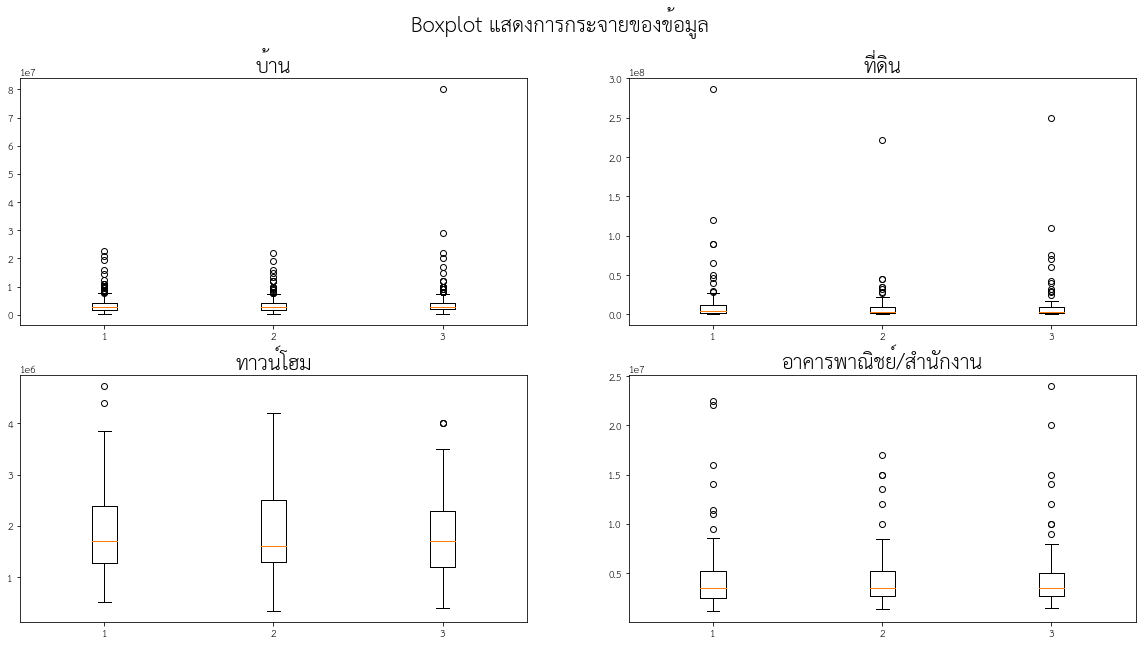

In [55]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')
matplotlib.rcParams['figure.figsize']=[20,10]
plt.suptitle('Boxplot แสดงการกระจายของข้อมูล',fontsize = 20)
plt.subplot(2,2,1)
plt.boxplot(homeviz1['ราคาทรัพย์'],positions = [1] )
plt.boxplot(homeviz1['ประเมิน1'],positions = [2] )
plt.boxplot(homeviz1['ประเมิน2'],positions = [3] );
plt.title('บ้าน',fontsize=20)

plt.subplot(2,2,2)
plt.boxplot(landviz1['ราคาทรัพย์'],positions = [1] )
plt.boxplot(landviz1['ประเมิน1'],positions = [2] )
plt.boxplot(landviz1['ประเมิน2'],positions = [3] );
plt.title('ที่ดิน',fontsize=20)

plt.subplot(2,2,3)
plt.boxplot(twviz1['ราคาทรัพย์'],positions = [1] )
plt.boxplot(twviz1['ประเมิน1'],positions = [2] )
plt.boxplot(twviz1['ประเมิน2'],positions = [3] );
plt.title('ทาวน์โฮม',fontsize=20)

plt.subplot(2,2,4)
plt.boxplot(cbviz1['ราคาทรัพย์'],positions = [1] )
plt.boxplot(cbviz1['ประเมิน1'],positions = [2] )
plt.boxplot(cbviz1['ประเมิน2'],positions = [3] );
plt.title('อาคารพาณิชย์/สำนักงาน',fontsize=20)



<Figure size 1440x720 with 0 Axes>

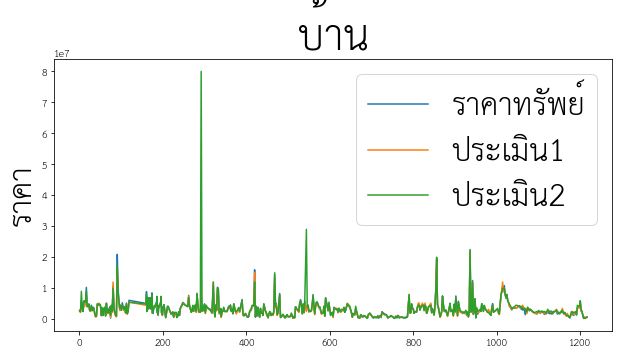

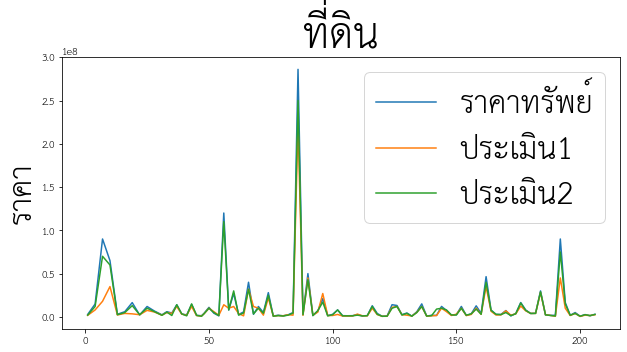

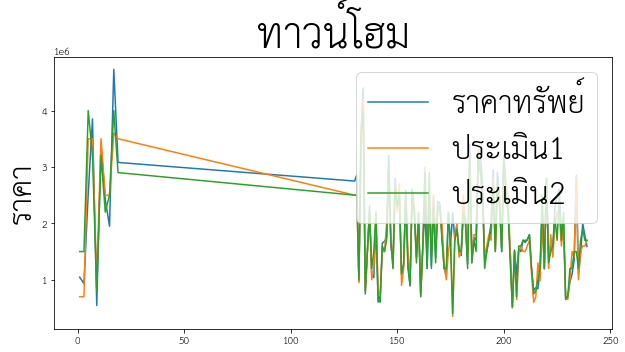

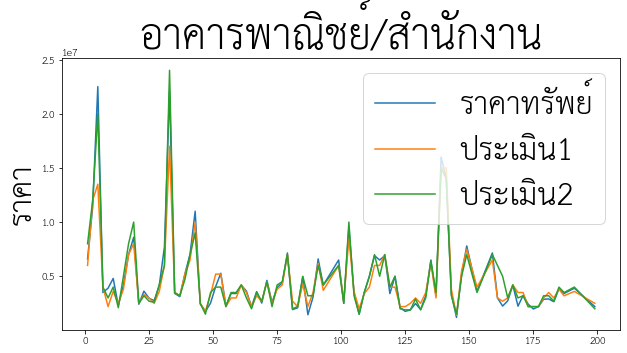

In [56]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')
import matplotlib
plt.suptitle('ความสัมพันธ์ราคาตั้งขายและราคาประเมิน',fontsize = 20)
matplotlib.rcParams['figure.figsize']=[10,5]
homeviz1.plot(kind="line")
plt.title('บ้าน',fontsize=40)
plt.ylabel('ราคา',fontsize=30)
plt.legend( loc ="upper right",fontsize=30)
plt.show()

matplotlib.rcParams['figure.figsize']=[10,5]
landviz1.plot(kind="line")
plt.title('ที่ดิน',fontsize=40)
plt.ylabel('ราคา',fontsize=30)
plt.legend( loc ="upper right",fontsize=30)
plt.show()

matplotlib.rcParams['figure.figsize']=[10,5]
twviz1.plot(kind="line")
plt.title('ทาวน์โฮม',fontsize=40)
plt.ylabel('ราคา',fontsize=30)
plt.legend( loc ="upper right",fontsize=30)
plt.show()

matplotlib.rcParams['figure.figsize']=[10,5]
cbviz1.plot(kind="line")
plt.title('อาคารพาณิชย์/สำนักงาน',fontsize=40)
plt.ylabel('ราคา',fontsize=30)
plt.legend( loc ="upper right",fontsize=30)
plt.show()


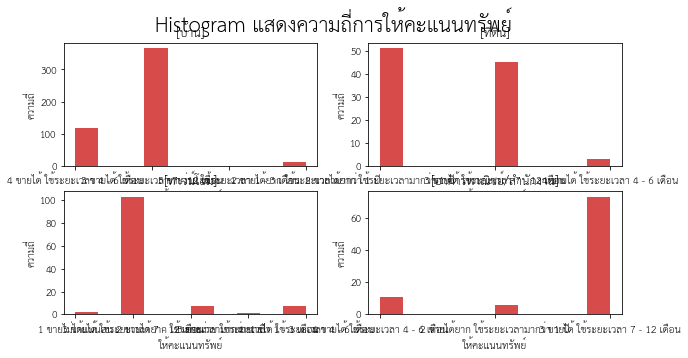

In [57]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')
import matplotlib
plt.suptitle('Histogram แสดงความถี่การให้คะแนนทรัพย์',fontsize = 20)
matplotlib.rcParams['figure.figsize']=[20,10]
plt.subplot(2,2,1)
plt.hist(homeviz['ให้คะแนนทรัพย์'],bins=10,color='#D74B4B')
plt.title('[บ้าน]')
plt.xlabel('ให้คะแนนทรัพย์')
plt.ylabel('ความถี่');

plt.subplot(2,2,2)
plt.hist(landviz['ให้คะแนนทรัพย์'],bins=10,color='#D74B4B')
plt.title('[ที่ดิน]')
plt.xlabel('ให้คะแนนทรัพย์')
plt.ylabel('ความถี่');

plt.subplot(2,2,3)
plt.hist(twviz['ให้คะแนนทรัพย์'],bins=10,color='#D74B4B')
plt.title('[ทาวน์โฮม]')
plt.xlabel('ให้คะแนนทรัพย์')
plt.ylabel('ความถี่');

plt.subplot(2,2,4)
plt.hist(cbvizdrop['ให้คะแนนทรัพย์'],bins=10,color='#D74B4B')
plt.title('[อาคารพาณิชย์/สำนักงาน]')
plt.xlabel('ให้คะแนนทรัพย์')
plt.ylabel('ความถี่');

     

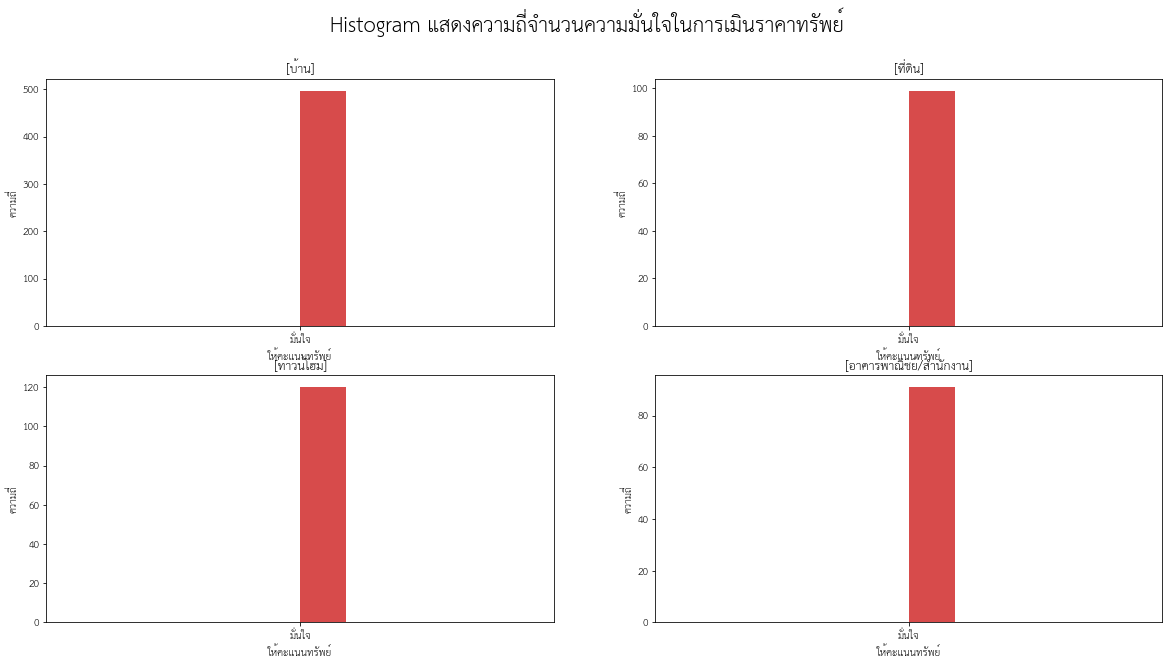

In [58]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')
import matplotlib
plt.suptitle('Histogram แสดงความถี่จำนวนความมั่นใจในการเมินราคาทรัพย์',fontsize = 20)
matplotlib.rcParams['figure.figsize']=[20,10]
plt.subplot(2,2,1)
plt.hist(homeviz['ความมั่นใจในการเมินราคาทรัพย์'],bins=10,color='#D74B4B')
plt.title('[บ้าน]')
plt.xlabel('ให้คะแนนทรัพย์')
plt.ylabel('ความถี่');

plt.subplot(2,2,2)
plt.hist(landviz['ความมั่นใจในการเมินราคาทรัพย์'],bins=10,color='#D74B4B')
plt.title('[ที่ดิน]')
plt.xlabel('ให้คะแนนทรัพย์')
plt.ylabel('ความถี่');

plt.subplot(2,2,3)
plt.hist(twviz['ความมั่นใจในการเมินราคาทรัพย์'],bins=10,color='#D74B4B')
plt.title('[ทาวน์โฮม]')
plt.xlabel('ให้คะแนนทรัพย์')
plt.ylabel('ความถี่');

plt.subplot(2,2,4)
plt.hist(cbviz['ความมั่นใจในการเมินราคาทรัพย์'],bins=10,color='#D74B4B')
plt.title('[อาคารพาณิชย์/สำนักงาน]')
plt.xlabel('ให้คะแนนทรัพย์')
plt.ylabel('ความถี่');